In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv("./dados/ratings.csv")
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape


(100836, 4)

In [4]:
notas.columns = ["usuarioID","filmeID","nota","momento"]
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [7]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


<Axes: ylabel='Frequency'>

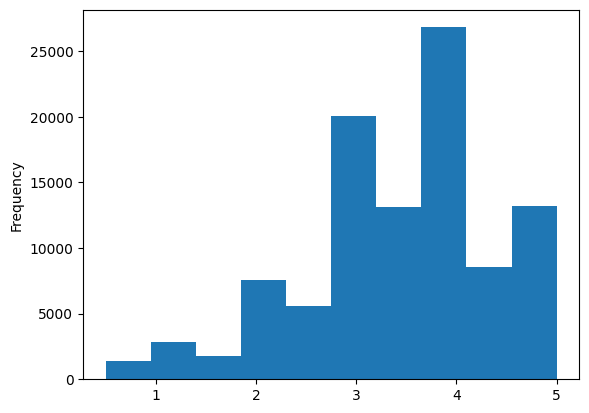

In [8]:
notas.nota.plot(kind = 'hist')

In [9]:
notas.nota.describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

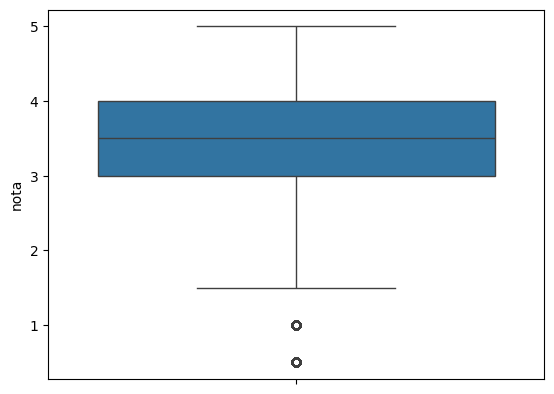

In [10]:
import seaborn as sns
sns.boxplot(notas.nota)

In [11]:
filmes = pd.read_csv("./dados/movies.csv")
filmes.columns = ["filmeID","titulo","generos"]
filmes.head()


,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando notas do toystory

In [12]:
notas.query("filmeID==1").nota.mean()


np.float64(3.9209302325581397)

In [13]:
notas.query("filmeID==2").nota.mean()


np.float64(3.4318181818181817)

In [14]:
medias_por_filme = notas.groupby("filmeID").mean()["nota"]
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

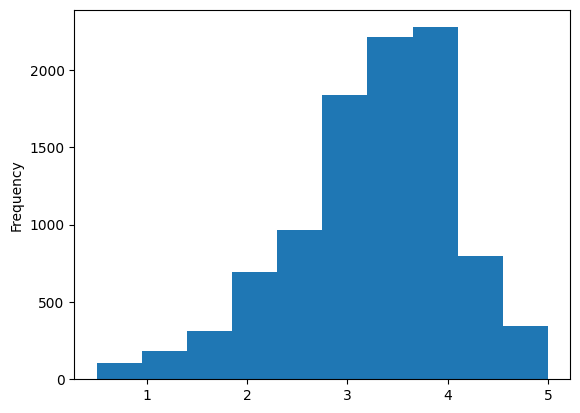

In [15]:
medias_por_filme.plot(kind="hist")

<Axes: ylabel='nota'>

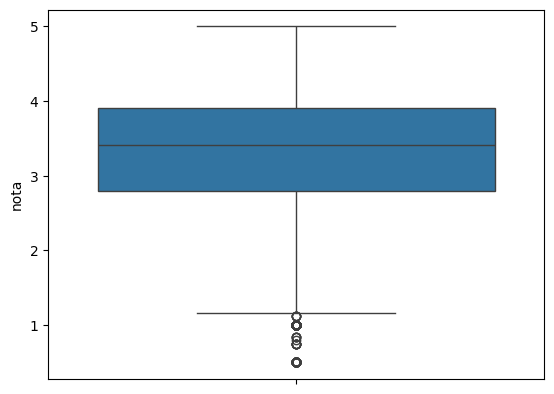

In [16]:
sns.boxplot(y=medias_por_filme)

In [17]:
medias_por_filme.describe()


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

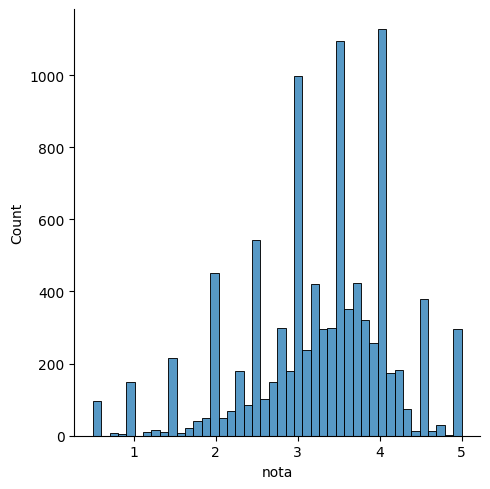

In [18]:
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'histograma das médias dos filmes')

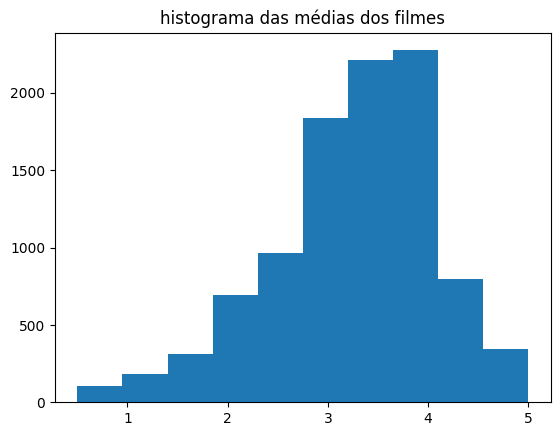

In [19]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("histograma das médias dos filmes")

In [20]:
tmbd = pd.read_csv("./dados/tmdb_5000_movies.csv")

In [21]:
contagem_de_lingua = tmbd["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

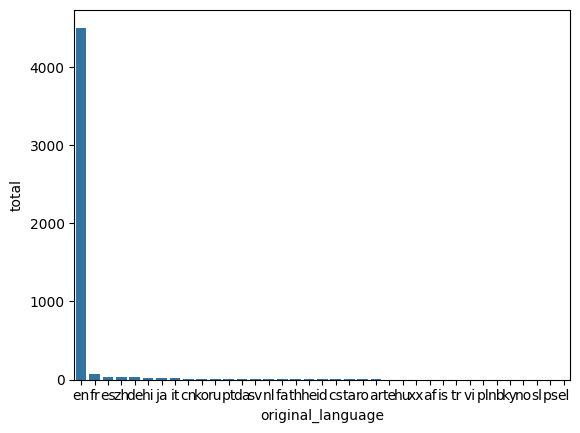

In [22]:
sns.barplot(x = "original_language", y="total" ,data = contagem_de_lingua)

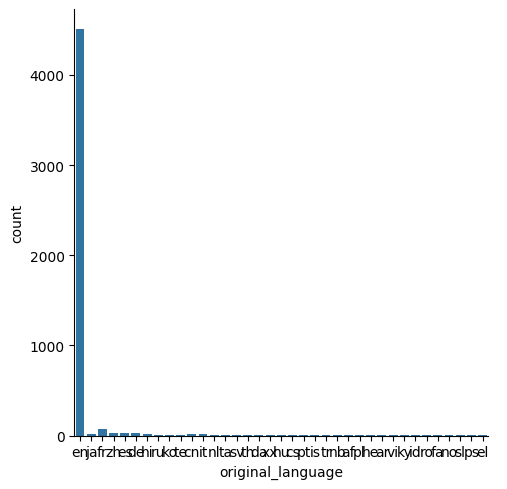

In [23]:
sns.catplot(x= "original_language", kind="count", data = tmbd)

([<matplotlib.patches.Wedge at 0x21f79e2b230>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'en'),
  Text(1.0355355060813987, -0.371033981792425, 'fr'),
  Text(1.0579676532751783, -0.30117178590202043, 'es'),
  Text(1.0687996896821872, -0.2601292435218708, 'zh'),
  Text(1.0773192231958597, -0.22222351660584796, 'de'),
  Text(1.0835168605253713, -0.18971350230609152, 'hi'),
  Text(1.0875755883723952, -0.16486157701671572, 'ja'),
  Text(1.0906010458121063, -0.14348992603503677, 'it'),
  Text(1.092883468191142, -0.12492287602557497, 'cn'),
  Text(1.094639090663068, -0.10846778873163951, 'ko'),
  Text(1.0960865548595407, -0.0927052547385707, 'ru'),
  Text(1.097205502470541, -0.078358696699014, 'pt'),
  Text(1.0979654406138135, -0.06687220063460171, 'da'),
  Text(1.0984565068410161, -0.05825206072434674, 'sv'),
  Text(1.0987803772611597, -0.05178496447641595, 'nl'),
  Text(1.0990363134163792, -0.04603457170578121, 'fa'),
  Text(1.0992355467780295, -0.041002593815593756, 'th'),
  Text(1.

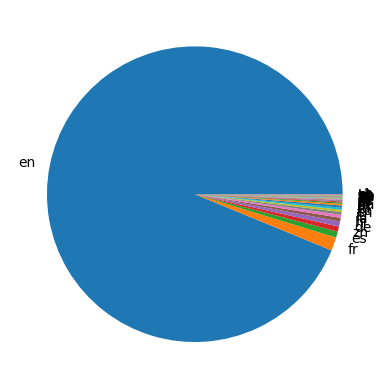

In [24]:
plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language)

In [25]:
total_por_lingua = tmbd.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles,total_do_resto)

4505 298


In [26]:
dados = {
    'lingua' : ['ingles', 'outros' ],
    'total' : [total_de_ingles,total_do_resto]

}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

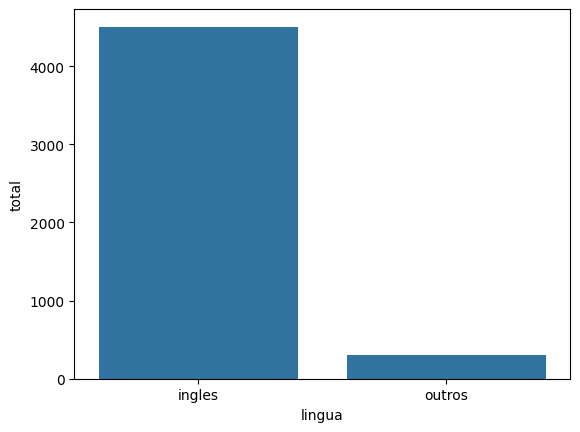

In [27]:
sns.barplot(x="lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x21f79fa8a50>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'ingles'),
  Text(1.0791697115180023, -0.21305570572540808, 'outros')])

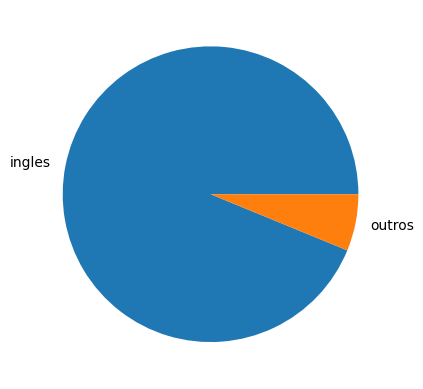

In [28]:
plt.pie(dados["total"], labels = dados["lingua"])

In [29]:
total_por_lingua_outros_filmes = tmbd.query("original_language != 'en'").original_language.value_counts()

C:\Users\rafael.inforsato\AppData\Local\Temp\ipykernel_17840\2259031753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x= "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2,


<Figure size 500x1000 with 0 Axes>

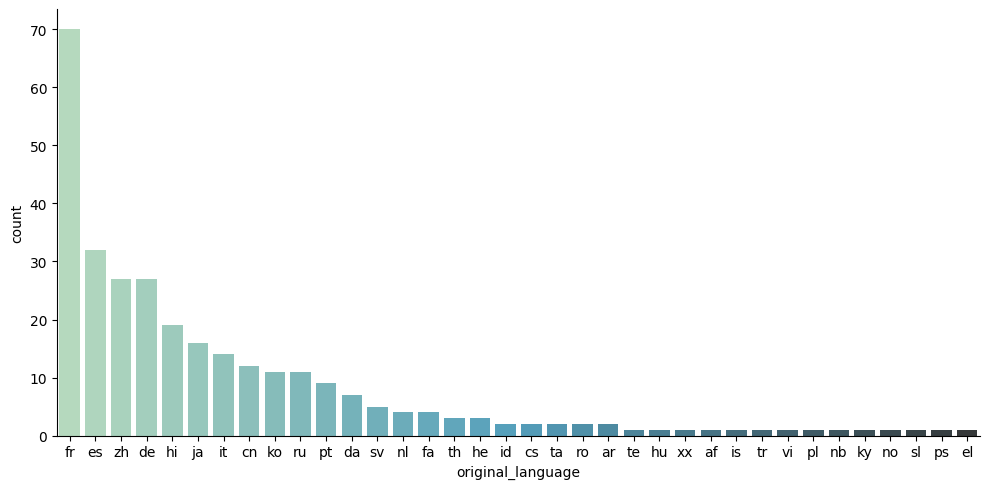

In [30]:
filmes_sem_lingua_original_em_ingles = tmbd.query("original_language != 'en'")
plt.figure(figsize=(5,10))
sns.catplot(x= "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2,
            order = total_por_lingua_outros_filmes.index, palette="GnBu_d")